# Plate reader data analysis

<div id="toc-wrapper"><h3> Table of Contents </h3><div id="toc" style="max-height: 787px;"><ol class="toc-item"><li><a href="#Global-imports,-variables-and-functions">Global imports, variables and functions</a></li><li><a href="#Initiation-rates-used-for-Run-3-initiation-mutant-simulations-(for-Fig.-4-and-Fig.-4--Figure-supplement-1)">Initiation rates used for Run 3 initiation mutant simulations (for Fig. 4 and Fig. 4--Figure supplement 1)</a></li><li><a href="#Single-mutant-data-used-for-Run-3-initiation-mutant-simulations--(for-Fig.-4-and-Fig.-4--Figure-supplement-1)">Single mutant data used for Run 3 initiation mutant simulations  (for Fig. 4 and Fig. 4--Figure supplement 1)</a></li><li><a href="#Single-mutant-data-used-for-Run-4-double-mutant-simulations-(for-Fig.-5--Figure-supplement-1)">Single mutant data used for Run 4 double mutant simulations (for Fig. 5--Figure supplement 1)</a></li><li><a href="#Serine-single-mutant-data-used-for-Run-14-initiation-rate-simulations-(for-Fig.-4--Figure-supplement-1)">Serine single mutant data used for Run 14 initiation rate simulations (for Fig. 4--Figure supplement 1)</a></li><li><a href="#Serine-single-mutant-data-used-for-Run-15-double-mutant-simulations-(for-Fig.-5--Figure-supplement-1)">Serine single mutant data used for Run 15 double mutant simulations (for Fig. 5--Figure supplement 1)</a></li><li><a href="#Single-mutant-data-used-for-Run-16-multiple-CTA-mutant-simulations-(for-Fig.-5)">Single mutant data used for Run 16 multiple CTA mutant simulations (for Fig. 5)</a></li><li><a href="#Single-mutant-data-used-for-Run-5-distance-CTC-mutant-simulations-(for-Fig.-6---Figure-supplement-1)">Single mutant data used for Run 5 distance CTC mutant simulations (for Fig. 6 --Figure supplement 1)</a></li><li><a href="#Single-mutant-data-used-for-Run-11-distance-CTA-mutant-simulations-(for-Fig.-6)">Single mutant data used for Run 11 distance CTA mutant simulations (for Fig. 6)</a></li><li><a href="#Leucine-initiation-mutant-data-used-for-comparison-with-Run-3-simulations-(for-Fig.-4,--Fig.-4--Figure-supplement-1)">Leucine initiation mutant data used for comparison with Run 3 simulations (for Fig. 4,  Fig. 4--Figure supplement 1)</a></li><li><a href="#Serine-initiation-mutant-data-used-for-comparison-with-Run-14-simulations-(for-Fig.-4--Figure-supplement-1)">Serine initiation mutant data used for comparison with Run 14 simulations (for Fig. 4--Figure supplement 1)</a></li><li><a href="#Leucine-multiple-mutant-data-used-for-comparison-with-Run-16-simulations-(for-Fig.-5)">Leucine multiple mutant data used for comparison with Run 16 simulations (for Fig. 5)</a></li><li><a href="#Double-mutant-data-used-for-comparison-with-Run-4-simulations-(for-Fig.-5--Figure-supplement-1)">Double mutant data used for comparison with Run 4 simulations (for Fig. 5--Figure supplement 1)</a></li><li><a href="#Serine-double-mutant-data-used-for-comparison-with-Run-15-simulations-(for-Fig.-5--Figure-supplement-1)">Serine double mutant data used for comparison with Run 15 simulations (for Fig. 5--Figure supplement 1)</a></li><li><a href="#CTA-distance-mutant-data-used-for-comparison-with-Run-11-simulations-(for-Fig.-6)">CTA distance mutant data used for comparison with Run 11 simulations (for Fig. 6)</a></li><li><a href="#CTC-distance-mutant-data-used-for-comparison-with-Run-5-simulations-(for-Fig.-6--Figure-supplement-1)">CTC distance mutant data used for comparison with Run 5 simulations (for Fig. 6--Figure supplement 1)</a></li><li><a href="#Chrom-vs.-Plasmid-comparison-to-address-reviewer's-comments-(Author-Response-Fig.-1,-2)">Chrom vs. Plasmid comparison to address reviewer's comments (Author Response Fig. 1, 2)</a></li></ol></div></div>


The run numbers above refer to the simulation runs in `scripts/run_simulation.ipynb`.

### Global imports, variables and functions

In [1]:
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
from scipy.stats import tsem
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

od_background = 0.047  # based on well with just growth medium
yfp_background = 69  # based on well with just growth medium

fitpoints = {
    'rich': {
        '2016-01-14': {
            'start': 120,
            'end': 300
        },
        '2016-01-27': {
            'start': 120,
            'end': 300
        },
        '2016-02-04': {
            'start': 120,
            'end': 300
        },
        '2016-03-14': {
            'start': 120,
            'end': 300
        },
        '2016-04-19': {
            'start': 120,
            'end': 300
        },
        '2017-02-01': {
            'start': 120,
            'end': 300
        },
        '2017-02-16': {
            'ser': {
                'start': 120,
                'end': 300
            },
            'leu': {
                'start': 120,
                'end': 300
            },
        },
    },
    'starvation': {
        '2016-01-14': {
            'start': 250,
            'end': 600
        },
        '2016-01-27': {
            'start': 250,
            'end': 600
        },
        '2016-02-04': {
            'start': 250,
            'end': 600
        },
        '2016-03-14': {
            'start': 250,
            'end': 600
        },
        '2016-04-19': {
            'start': 250,
            'end': 600
        },
        '2017-02-01': {
            'start': 250,
            'end': 600
        },
        '2017-02-16': {
            'ser': {
                'start': 200,
                'end': 400
            },
            'leu': {
                'start': 250,
                'end': 450
            },
        },
    }
}


# find points for fitting synthesis rate during rich and starvation
def check_fit(row, growth=['rich', 'starvation']):
    date = row['date']
    time = row['time']
    if date not in fitpoints[growth].keys():
        raise KeyError
    if 'limited_aa' in row:
        aa = row['limited_aa']
        start = fitpoints[growth][date][aa]['start']
        end = fitpoints[growth][date][aa]['end']
    else:
        start = fitpoints[growth][date]['start']
        end = fitpoints[growth][date]['end']
    return (time >= start and time <= end)


# linear function  used for fitting fluorescence data during starvation
def Poly1(x, a, b):
    return b * x / 60 - a / 60


# find synthesis rate for single sample during rich and starvation conditions
def find_synthesis_rate(df):
    # presynthesis rate
    # sort by time and reset index to serial integers
    df = df.sort_values(by='time').reset_index()

    #excludedPoints = y["time"] < pointsForPreFit[y['date']]['start']
    #startingPoint = np.argmax(y['time'][excludedPoints]) + 1
    #minimumPoint = np.argmin(y['yfp/od'][pointsForPreRate]) + startingPoint
    # the average over 3 points where the yfp/od hits minimum is calculated
    #return np.mean(y['yfp/od'][minimumPoint-2:minimumPoint+1])

    # find min pre-starv yfp/od
    minidx = df['yfp/od'][df['richfit']].argmin()
    # find average of yfp/od for 3 points upto min
    richrate = df.loc[minidx - 2:minidx, 'yfp/od'].mean()

    # fit straight line to starvation phase
    BestFitParam, BestFitCOV = curve_fit(Poly1,
                                         list(df['time'][df['starvefit']]),
                                         list(df['yfp'][df['starvefit']]))
    # slope is post rate
    starverate = BestFitParam[1]
    # print(df.drop('time', 1).ix[0])
    return (df.drop([
        'time', 'od', 'yfp', 'richfit', 'starvefit', 'yfp/od', 'index', 'date',
        'plate', 'well'
    ], 1).ix[0].append(
        pd.Series({
            'richrate': richrate,
            'starverate': starverate
        })))


# get synthesis rate for all samples
def get_synthesis_rate(df):
    df['od'] = df['od'] - od_background
    df['yfp'] = df['yfp'] - yfp_background
    df['yfp/od'] = df['yfp'] / df['od']

    # calculate time points for rich and starvation YFP synthesis rates
    df['richfit'] = df.apply(lambda row: check_fit(row, 'rich'), axis=1)
    df['starvefit'] = df.apply(
        lambda row: check_fit(row, 'starvation'), axis=1)

    # group all data points for each well
    wells = df.groupby(['date', 'plate', 'well'])

    # find pre and post synthesis rates for each label
    welldata = wells.apply(find_synthesis_rate).reset_index()
    return welldata


# average synthesis rate over replicate wells
def get_av_synthesis_rate(df):
    # groupby date and sampelname and calculate mean and stderr
    groupedReplicates = df.groupby('sample')
    average = groupedReplicates[['richrate', 'starverate']].agg(np.mean).rename(
        columns={'richrate': 'richrate_mean',
                 'starverate': 'starverate_mean'})
    error = groupedReplicates[['richrate', 'starverate']].agg(tsem).rename(
        columns={'richrate': 'richrate_err',
                 'starverate': 'starverate_err'})
    wellannotations = df.drop(['richrate', 'starverate'],
                              1).groupby('sample').first()
    averagedData = pd.concat(
        [average, error, wellannotations], join='inner', axis=1)
    return averagedData

### Initiation rates used for Run 3 initiation mutant simulations (for Fig. 4 and Fig. 4--Figure supplement 1)

In [2]:
# read in raw data for each well and corresponding annotations and merge
rawdata1 = pd.read_table('../rawdata/platereader/initiation_cta_data.tsv')
annotations1 = pd.read_table(
    '../rawdata/platereader/initiation_cta_annotations.tsv')
rawdata1 = rawdata1.merge(annotations1, on=['plate', 'well'], how='inner')
rawdata2 = pd.read_table('../rawdata/platereader/initiation_ctc_ctt_data.tsv')
annotations2 = pd.read_table(
    '../rawdata/platereader/initiation_ctc_ctt_annotations.tsv')
rawdata2 = rawdata2.merge(annotations2, on=['plate', 'well'], how='inner')
rawdata = pd.concat([rawdata1, rawdata2])

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)

# group by all variants having the same initiation region
groupedReplicates = welldata[['richrate', 'initiation']].groupby('initiation')

# infer mean initiation rate for each set of initiation rate mutants
# normalize by the 'wt' mutant
inferredInitRate = groupedReplicates.agg(np.mean)
inferredInitRate = inferredInitRate / inferredInitRate['richrate'].ix['wt']
inferredInitRate.rename(
    columns={'richrate': 'inferredInitiationRate'}, inplace=True)
inferredInitRate[['inferredInitiationRate']].to_csv(
    '../processeddata/platereader/inferred_initiationrates_for_initiation_simulations.tsv',
    sep='\t')
inferredInitRate

,inferredInitiationRate
initiation,
ATC,0.477902
RBS2,0.731301
RBS4,1.112574
TTG,0.337290
wt,1.000000


### Single mutant data used for Run 3 initiation mutant simulations  (for Fig. 4 and Fig. 4--Figure supplement 1)

In [3]:
# read in raw data for each well and corresponding annotations and merge
rawdata1 = pd.read_table('../rawdata/platereader/initiation_cta_data.tsv')
annotations1 = pd.read_table(
    '../rawdata/platereader/initiation_cta_annotations.tsv')
rawdata1 = rawdata1.merge(annotations1, on=['plate', 'well'], how='inner')
rawdata2 = pd.read_table('../rawdata/platereader/initiation_ctc_ctt_data.tsv')
annotations2 = pd.read_table(
    '../rawdata/platereader/initiation_ctc_ctt_annotations.tsv')
rawdata2 = rawdata2.merge(annotations2, on=['plate', 'well'], how='inner')
rawdata = pd.concat([rawdata1, rawdata2])

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# select only wt RBS samples
subsetdata = sampledata[((sampledata['initiation'] == 'wt'))]
# normalize by wt RBS variant without any pause site
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
normalizationdata = float(subsetdata.loc[normindex, 'starverate_mean'])
# select only single stall site samples
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) == 1)]
# normalization
subsetdata['measuredRateNormalized'] = subsetdata[
    'starverate_mean'] / normalizationdata
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')
summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_initiation_simulations.tsv',
    sep='\t')
summarydata

,measuredRateNormalized
label,
cta6,0.303928
cta10,0.229461
cta14,0.385538
cta18,0.344537
ctc10,0.582338
ctc14,0.651636
ctt6,0.423412
ctt10,0.318042


### Single mutant data used for Run 4 double mutant simulations (for Fig. 5--Figure supplement 1)

In [4]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/doubles_data.tsv')
annotations = pd.read_table('../rawdata/platereader/doubles_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata.apply(
    lambda row: row['strain_id'][:-2] + '_' + str(row['plate']), axis=1)
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# normalize by max value within each plate (corresponding to no pause variant)
sampledata['measuredRateNormalized'] = sampledata.groupby(
    'plate')['starverate_mean'].transform(lambda x: x / x.max())
subsetdata = sampledata
# select only single stall site samples
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) == 1)]
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')
summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_double_simulations.tsv',
    sep='\t')
summarydata

,measuredRateNormalized
label,
cta2,0.171785
cta6,0.224788
cta10,0.158591
cta14,0.316839
cta18,0.297784
ctc2,0.407218
ctc6,0.608872
ctc10,0.747329
ctc14,0.818875


### Serine single mutant data used for Run 14 initiation rate simulations (for Fig. 4--Figure supplement 1)

In [5]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/serine_multiple_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/serine_multiple_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()
# select only wt RBS samples
subsetdata = sampledata[((sampledata['initiation_variant'] == 'wt'))]
# normalize by wt RBS variant without any pause site
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
normalizationdata = float(subsetdata.loc[normindex, 'starverate_mean'])
# select only single stall samples
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(lambda x: x == '5')]
# normalization
subsetdata['measuredRateNormalized'] = subsetdata[
    'starverate_mean'] / normalizationdata
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')
summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_serine_initiation_simulations.tsv',
    sep='\t',
    index_label='')
summarydata

,measuredRateNormalized
label,
tcg5,0.809052


### Serine single mutant data used for Run 15 double mutant simulations (for Fig. 5--Figure supplement 1)

In [6]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/serine_multiple_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/serine_multiple_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# select only serine mutants used for double mutant expt
sampledata = sampledata[sampledata['initiation_variant'].apply(
    lambda x: pd.isnull(x) or x == 'wt')]
sampledata = sampledata[sampledata['limited_aa'].apply(lambda x: x == 'ser')]

# normalize by max value within each plate (corresponding to no pause variant)
sampledata['measuredRateNormalized'] = sampledata.groupby(
    'plate')['starverate_mean'].transform(lambda x: x / x.max())
subsetdata = sampledata
# select only single stall site samples
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) == 1)]
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')

summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_serine_double_simulations.tsv',
    sep='\t',
    index_label='')
summarydata

,measuredRateNormalized
label,
tcg2,0.676833
tcg3,0.683100
tcg4,0.789628
tcg5,0.809052
tcg6,0.740441
tcg7,0.844806
tcg8,0.890436


### Single mutant data used for Run 16 multiple CTA mutant simulations (for Fig. 5)

In [7]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/serine_multiple_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/serine_multiple_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# select only serine mutants used for double mutant expt
sampledata = sampledata[sampledata['limited_aa'].apply(lambda x: x == 'leu')]

# normalize by max value within each plate (corresponding to no pause variant)
sampledata['measuredRateNormalized'] = sampledata.groupby(
    'plate')['starverate_mean'].transform(lambda x: x / x.max())
subsetdata = sampledata
# select only single stall site samples
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) == 1)]
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')

summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_leucine_multiple_simulations.tsv',
    sep='\t',
    index_label='')
summarydata

,measuredRateNormalized
label,
cta2,0.190919
cta6,0.272954
cta10,0.204786
cta14,0.333250
cta18,0.286355


### Single mutant data used for Run 5 distance CTC mutant simulations (for Fig. 6 --Figure supplement 1)

In [8]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/distance_ctc_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/distance_ctc_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# normalize by max value (corresponding to no pause variant)
sampledata['measuredRateNormalized'] = sampledata[
    'starverate_mean'] / sampledata['starverate_mean'].max()
subsetdata = sampledata
# select only single stall site samples
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) == 1)]
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')

summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_distance_simulations.tsv',
    sep='\t')
summarydata

,measuredRateNormalized
label,
ctc8,0.687575
ctc9,0.646659
ctc10,0.681533
ctc11,0.618805
ctc12,0.622357
ctc13,0.713587
ctc14,0.796001


### Single mutant data used for Run 11 distance CTA mutant simulations (for Fig. 6)

In [9]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/distance_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/distance_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# normalize by max value (corresponding to no pause variant)
sampledata['measuredRateNormalized'] = sampledata[
    'starverate_mean'] / sampledata['starverate_mean'].max()
subsetdata = sampledata
# select only single stall site samples
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) == 1)]
# define label
subsetdata['label'] = subsetdata.apply(
    lambda row: row['pausecodon'].lower() + row['pauselocation'], axis=1)
subsetdata['pauselocation'] = subsetdata['pauselocation'].apply(int)
subsetdata = subsetdata.sort_values(by=['pausecodon', 'pauselocation'])
summarydata = subsetdata[['label', 'measuredRateNormalized']]
summarydata = summarydata.set_index('label')

summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_for_cta_distance_simulations.tsv',
    sep='\t')
summarydata

,measuredRateNormalized
label,
cta8,0.325880
cta9,0.227703
cta10,0.206188
cta11,0.270118
cta12,0.285635
cta13,0.284764
cta14,0.314228


### Leucine initiation mutant data used for comparison with Run 3 simulations (for Fig. 4,  Fig. 4--Figure supplement 1)

In [2]:
# read in raw data for each well and corresponding annotations and merge
rawdata1 = pd.read_table('../rawdata/platereader/initiation_cta_data.tsv')
annotations1 = pd.read_table(
    '../rawdata/platereader/initiation_cta_annotations.tsv')
rawdata1 = rawdata1.merge(annotations1, on=['plate', 'well'], how='inner')
rawdata2 = pd.read_table('../rawdata/platereader/initiation_ctc_ctt_data.tsv')
annotations2 = pd.read_table(
    '../rawdata/platereader/initiation_ctc_ctt_annotations.tsv')
rawdata2 = rawdata2.merge(annotations2, on=['plate', 'well'], how='inner')
rawdata = pd.concat([rawdata1, rawdata2])

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

subsetdata = sampledata[((sampledata['initiation'].apply(
    lambda x: not pd.isnull(x))))]

normalization = subsetdata.loc[subsetdata['pausecodon'].apply(
    lambda x: pd.isnull(x)
), ['starverate_mean', 'starverate_err', 'initiation']].set_index('initiation')

for row in subsetdata[['pausecodon', 'pauselocation']].drop_duplicates(
        keep='first').iterrows():
    pausecodon = row[1]['pausecodon']
    pauselocation = row[1]['pauselocation']
    if pd.isnull(pausecodon):  # exclude no pause control
        continue
    if len(pauselocation.split(',')) != 1:  # exclude many pause control
        continue
    summarydata = subsetdata.loc[
        ((subsetdata['pauselocation'] == pauselocation) &
         (subsetdata['pausecodon'] == pausecodon)), [
             'starverate_mean', 'starverate_err', 'initiation', 'richrate_mean'
         ]].set_index('initiation')

    normalizationdata = normalization.ix[summarydata.index]

    summarydata.loc[:, 'starverate_err'] = (
        summarydata.loc[:, 'starverate_err'].values /
        summarydata.loc[:, 'starverate_mean'].values +
        normalizationdata.loc[:, 'starverate_err'].values /
        normalizationdata.loc[:, 'starverate_mean'].values)

    summarydata.loc[:, 'starverate_mean'] = (
        summarydata.loc[:, 'starverate_mean'] /
        normalizationdata.loc[:, 'starverate_mean'])

    summarydata.loc[:,
                    'starverate_err'] *= summarydata.loc[:,
                                                         'starverate_mean'].values

    summarydata.to_csv(
        '../processeddata/platereader/measured_yfprates_' + pausecodon.lower()
        + pauselocation + '_initiation_mutants.tsv',
        sep='\t')
    display(Markdown('**{}{}**'.format(pausecodon, pauselocation)))
    display(summarydata)

**CTT10**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
wt,0.318042,0.017261,38689.654350
TTG,0.648113,0.052457,12562.142331
ATC,0.511094,0.026543,20642.153810
RBS2,0.472924,0.013474,30853.389552
RBS4,0.341356,0.018972,47207.684935


**CTC10**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.840797,0.041461,12355.518308
ATC,0.763430,0.023606,20036.156523
RBS2,0.709053,0.032872,29995.923527
RBS4,0.621765,0.028562,47036.552791
wt,0.582338,0.023900,43956.361634


**CTC14**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.889600,0.070675,11902.140816
ATC,0.821194,0.031650,18746.807511
RBS2,0.884476,0.073296,33438.206385
RBS4,0.715794,0.030441,46088.268097
wt,0.651636,0.030557,40943.525748


**CTT6**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.678632,0.062761,13146.031332
ATC,0.543485,0.023146,21421.899946
RBS2,0.472156,0.055165,30642.361761
RBS4,0.385909,0.009965,47100.740977
wt,0.423412,0.026079,46098.868902


**CTA6**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.443839,0.052841,16269.396907
RBS2,0.332863,0.020336,32849.301552
RBS4,0.251209,0.029883,47062.903358
wt,0.303928,0.022081,44343.058633


**CTA10**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.368502,0.041456,15840.469128
ATC,0.292160,0.018617,23296.265919
RBS2,0.280564,0.030081,31238.267866
RBS4,0.220833,0.005356,47203.079344
wt,0.229461,0.017871,39272.351020


**CTA14**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.503191,0.038305,15686.145812
ATC,0.473015,0.024920,20681.257780
RBS2,0.445447,0.020330,31292.032778
RBS4,0.318552,0.013651,48336.911754
wt,0.385538,0.016694,41167.261358


**CTA18**

,starverate_mean,starverate_err,richrate_mean
initiation,,,
TTG,0.621896,0.048745,14358.944185
ATC,0.504772,0.025518,18994.227312
RBS2,0.412495,0.023299,29720.540493
RBS4,0.318594,0.022771,47802.319668
wt,0.344537,0.025993,43414.549043


### Serine initiation mutant data used for comparison with Run 14 simulations (for Fig. 4--Figure supplement 1)

In [11]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/serine_multiple_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/serine_multiple_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

subsetdata = sampledata[((sampledata['initiation_variant'].apply(
    lambda x: not pd.isnull(x))) & (sampledata['limited_aa'].apply(
        lambda x: not pd.isnull(x))))]

normalizationdata = subsetdata.loc[
    subsetdata['pausecodon'].apply(lambda x: pd.isnull(x)),
    ['starverate_mean', 'starverate_err', 'initiation_variant']].set_index(
        'initiation_variant')

pausecodons = subsetdata['pausecodon'].unique()
pausecodon = pausecodons[0]

for pauselocation in subsetdata['pauselocation'].unique():
    if pauselocation != '5':
        continue
    summarydata = subsetdata.loc[
        subsetdata['pauselocation'] == pauselocation,
        ['starverate_mean', 'starverate_err', 'initiation_variant']].set_index(
            'initiation_variant')
    summarydata.loc[:, 'starverate_err'] = (
        summarydata.loc[:, 'starverate_err'].values /
        summarydata.loc[:, 'starverate_mean'].values +
        normalizationdata.loc[:, 'starverate_err'].values /
        normalizationdata.loc[:, 'starverate_mean'].values)

    summarydata.loc[:, 'starverate_mean'] = (
        summarydata.loc[:, 'starverate_mean'] /
        normalizationdata.loc[:, 'starverate_mean'])

    summarydata.loc[:,
                    'starverate_err'] *= summarydata.loc[:,
                                                         'starverate_mean'].values

    summarydata.to_csv(
        '../processeddata/platereader/measured_yfprates_' + pausecodon.lower()
        + pauselocation + '_initiation_mutants.tsv',
        sep='\t')
    display(Markdown('**{}{}**'.format(pausecodon, pauselocation)))
    display(summarydata)

**TCG5**

,starverate_mean,starverate_err
initiation_variant,,
wt,0.809052,0.023178
TTG,1.098876,0.037491
ATC,0.913414,0.111765
RBS2,0.890407,0.019397
RBS4,0.821327,0.061075


### Leucine multiple mutant data used for comparison with Run 16 simulations (for Fig. 5)

In [12]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/serine_multiple_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/serine_multiple_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# select only serine mutants used for double mutant expt
sampledata = sampledata[sampledata['limited_aa'].apply(lambda x: x == 'leu')]

# normalize by max value within each plate (corresponding to no pause variant)
norm = sampledata['starverate_mean'].max()
sampledata['starverate_err'] = sampledata['starverate_err'] / norm
sampledata['starverate_mean'] = sampledata['starverate_mean'] / norm
subsetdata = sampledata
# select only 1-4 stall samples
normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
subsetdata = subsetdata[~normindex]
subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
    lambda x: len(x.split(',')) > 4)]
# define label
summarydata = subsetdata[
    ['pausecodon', 'pauselocation', 'starverate_mean', 'starverate_err']]
summarydata.to_csv(
    '../processeddata/platereader/measured_yfprates_cta_multiple_mutants.tsv',
    sep='\t',
    index=False)
summarydata

,pausecodon,pauselocation,starverate_mean,starverate_err
35,CTA,"6,10,14",0.108193,0.023922
36,CTA,"6,10,18",0.105813,0.031174
37,CTA,"6,10,14,18",0.074351,0.035449
38,CTA,2,0.190919,0.029384
39,CTA,6,0.272954,0.007965
40,CTA,10,0.204786,0.030056
41,CTA,14,0.333250,0.040942
42,CTA,18,0.286355,0.005394
44,CTA,"2,14",0.124962,0.034798
45,CTA,"2,18",0.166188,0.045410


### Double mutant data used for comparison with Run 4 simulations (for Fig. 5--Figure supplement 1)

In [13]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/doubles_data.tsv')
annotations = pd.read_table('../rawdata/platereader/doubles_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata.apply(
    lambda row: row['strain_id'][:-2] + '_' + str(row['plate']), axis=1)
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# normalize by max value within each plate (corresponding to no pause variant)
norm = sampledata.groupby('plate')['starverate_mean'].transform(
    lambda x: x.max())
sampledata['starverate_err'] = sampledata['starverate_err'] / norm
sampledata['starverate_mean'] = sampledata['starverate_mean'] / norm
for pausecodon in sampledata['pausecodon'].unique():
    if pausecodon not in ['CTC', 'CTT', 'CTA']:
        continue
    subsetdata = sampledata
    # select only single stall site samples
    subsetdata = subsetdata[subsetdata['pausecodon'] == pausecodon]
    normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
    subsetdata = subsetdata[~normindex]
    subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
        lambda x: len(x.split(',')) > 4)]
    summarydata = subsetdata[
        ['pausecodon', 'pauselocation', 'starverate_mean', 'starverate_err']]
    summarydata.to_csv(
        '../processeddata/platereader/measured_yfprates_{}_double_mutants.tsv'.
        format(pausecodon.lower()),
        sep='\t',
        index=False)
    display(Markdown('**{}**'.format(pausecodon)))
    display(summarydata)

**CTT**

,pausecodon,pauselocation,starverate_mean,starverate_err
0,CTT,10,0.431487,0.010396
1,CTT,14,0.789663,0.028166
2,CTT,18,0.733365,0.007182
16,CTT,"2,14",0.362381,0.008304
17,CTT,"2,18",0.392638,0.006299
18,CTT,"6,14",0.457245,0.007891
19,CTT,"6,18",0.440528,0.028604
20,CTT,"10,14",0.428675,0.026286
21,CTT,"10,18",0.395161,0.021789
22,CTT,"2,6",0.251769,0.009749


**CTA**

,pausecodon,pauselocation,starverate_mean,starverate_err
26,CTA,2,0.171785,0.021595
27,CTA,6,0.224788,0.019202
28,CTA,10,0.158591,0.016815
29,CTA,14,0.316839,0.005631
30,CTA,18,0.297784,0.011593
34,CTA,"2,14",0.102935,0.010689
35,CTA,"2,18",0.170940,0.003687
36,CTA,"6,14",0.146685,0.007884
37,CTA,"6,18",0.156445,0.017380
38,CTA,"10,14",0.108254,0.005452


**CTC**

,pausecodon,pauselocation,starverate_mean,starverate_err
6,CTC,"2,14",0.365231,0.008754
7,CTC,"2,18",0.428413,0.008683
8,CTC,"6,14",0.553870,0.015503
9,CTC,"6,18",0.607476,0.016925
10,CTC,"10,14",0.642563,0.020819
11,CTC,"10,18",0.679807,0.007946
12,CTC,"2,6",0.269103,0.020010
13,CTC,"14,18",0.712054,0.013971
14,CTC,"2,10",0.320510,0.012594
15,CTC,"6,10",0.483822,0.008361


### Serine double mutant data used for comparison with Run 15 simulations (for Fig. 5--Figure supplement 1)

In [6]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/serine_multiple_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/serine_multiple_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# select only serine mutants used for double mutant expt
sampledata = sampledata[sampledata['initiation_variant'].apply(
    lambda x: pd.isnull(x) or x == 'wt')]
sampledata = sampledata[sampledata['limited_aa'].apply(lambda x: x == 'ser')]

# normalize by max value within each plate (corresponding to no pause variant)
norm = sampledata['starverate_mean'].max()
sampledata['starverate_err'] = sampledata['starverate_err'] / norm
sampledata['starverate_mean'] = sampledata['starverate_mean'] / norm
for pausecodon in sampledata['pausecodon'].unique():
    if pausecodon not in ['TCG']:
        continue
    subsetdata = sampledata
    # select only single stall site samples
    subsetdata = subsetdata[subsetdata['pausecodon'] == pausecodon]
    normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
    subsetdata = subsetdata[~normindex]
    subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
        lambda x: len(x.split(',')) > 4)]
    # TCG8 was not used for double mutant expt
    subsetdata = subsetdata[subsetdata['pauselocation'].apply(
        lambda x: x != '8')]
    summarydata = subsetdata[
        ['pausecodon', 'pauselocation', 'starverate_mean', 'starverate_err']]
    summarydata.to_csv(
        '../processeddata/platereader/measured_yfprates_{}_double_mutants.tsv'.
        format(pausecodon.lower()),
        sep='\t',
        index=False)
    display(Markdown('**{}**'.format(pausecodon)))
    display(summarydata)

**TCG**

,pausecodon,pauselocation,starverate_mean,starverate_err
1,TCG,2,0.676833,0.010117
2,TCG,3,0.683100,0.011257
3,TCG,4,0.789628,0.006436
4,TCG,5,0.809052,0.013044
5,TCG,6,0.740441,0.022510
6,TCG,7,0.844806,0.006194
10,TCG,"2,5",0.639850,0.026359
11,TCG,"2,6",0.575802,0.003365
12,TCG,"2,7",0.620216,0.007561
13,TCG,"3,5",0.693729,0.008726


### CTA distance mutant data used for comparison with Run 11 simulations (for Fig. 6)

In [15]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/distance_cta_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/distance_cta_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# normalize by max value within each plate (corresponding to no pause variant)
norm = sampledata['starverate_mean'].max()
sampledata['starverate_err'] = sampledata['starverate_err'] / norm
sampledata['starverate_mean'] = sampledata['starverate_mean'] / norm
for pausecodon in sampledata['pausecodon'].unique():
    if pausecodon not in ['CTA']:
        continue
    subsetdata = sampledata
    # select only single stall site samples
    subsetdata = subsetdata[subsetdata['pausecodon'] == pausecodon]
    normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
    subsetdata = subsetdata[~normindex]
    subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
        lambda x: len(x.split(',')) > 4)]
    subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
        lambda x: '9,' in x)]
    summarydata = subsetdata[
        ['pausecodon', 'pauselocation', 'starverate_mean', 'starverate_err']]
    summarydata.to_csv(
        '../processeddata/platereader/measured_yfprates_{}_distance_mutants.tsv'.
        format(pausecodon.lower()),
        sep='\t',
        index=False)
    display(Markdown('**{}**'.format(pausecodon)))
    display(summarydata)

**CTA**

,pausecodon,pauselocation,starverate_mean,starverate_err
1,CTA,"8,9",0.136273,0.012459
2,CTA,"8,10",0.101509,0.023147
3,CTA,"8,11",0.178172,0.011986
4,CTA,"8,12",0.173283,0.010144
5,CTA,"8,13",0.156874,0.002760
6,CTA,"8,14",0.176990,0.027423
12,CTA,"11,12",0.135461,0.014066
13,CTA,"13,14",0.123600,0.008373
14,CTA,9,0.227703,0.014838
15,CTA,10,0.206188,0.006772


### CTC distance mutant data used for comparison with Run 5 simulations (for Fig. 6--Figure supplement 1)

In [16]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/distance_ctc_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/distance_ctc_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')

# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()

# normalize by max value within each plate (corresponding to no pause variant)
norm = sampledata['starverate_mean'].max()
sampledata['starverate_err'] = sampledata['starverate_err'] / norm
sampledata['starverate_mean'] = sampledata['starverate_mean'] / norm
for pausecodon in sampledata['pausecodon'].unique():
    if pausecodon not in ['CTC']:
        continue
    subsetdata = sampledata
    # select only single stall site samples
    subsetdata = subsetdata[subsetdata['pausecodon'] == pausecodon]
    normindex = subsetdata['pausecodon'].apply(lambda x: pd.isnull(x))
    subsetdata = subsetdata[~normindex]
    subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
        lambda x: len(x.split(',')) > 4)]
    subsetdata = subsetdata[~subsetdata['pauselocation'].apply(
        lambda x: '13' in x or '14' in x)]
    summarydata = subsetdata[
        ['pausecodon', 'pauselocation', 'starverate_mean', 'starverate_err']]
    summarydata.to_csv(
        '../processeddata/platereader/measured_yfprates_{}_distance_mutants.tsv'.
        format(pausecodon.lower()),
        sep='\t',
        index=False)
    display(Markdown('**{}**'.format(pausecodon)))
    display(summarydata)

**CTC**

,pausecodon,pauselocation,starverate_mean,starverate_err
2,CTC,8,0.687575,0.006808
3,CTC,9,0.646659,0.015281
4,CTC,"8,9",0.387758,0.004063
5,CTC,"8,10",0.410743,0.010952
6,CTC,"9,10",0.392448,0.006810
9,CTC,11,0.618805,0.022442
10,CTC,12,0.622357,0.041011
11,CTC,"8,11",0.475482,0.009059
12,CTC,"8,12",0.514034,0.005433
13,CTC,"11,12",0.403571,0.005961


In [87]:
# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/chrom_vs_plasmid_data.tsv')
annotations = pd.read_table(
    '../rawdata/platereader/chrom_vs_plasmid_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')
# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata['strain_id'].apply(lambda x: x[:-2])
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()
chromdata = sampledata[sampledata['gene_location'] == 'chromosome']
#normalize
norm = float(chromdata['starverate_mean'].max())
chromdata['starverate_mean'] = chromdata['starverate_mean'] / norm
chromdata['starverate_err'] = chromdata['starverate_err'] / norm

# read in raw data for each well and corresponding annotations and merge
rawdata = pd.read_table('../rawdata/platereader/doubles_data.tsv')
annotations = pd.read_table('../rawdata/platereader/doubles_annotations.tsv')
rawdata = rawdata.merge(annotations, on=['plate', 'well'], how='inner')
# calculate the yfp synthesis rate for each well
welldata = get_synthesis_rate(rawdata)
# define sample column for averaging over replicates
# this is specific for each experiment
welldata['sample'] = welldata.apply(
    lambda row: row['strain_id'][:-2] + '_' + str(row['plate']), axis=1)
# average synthesis rate over replicates
sampledata = get_av_synthesis_rate(welldata).reset_index()
plasmiddata = sampledata[sampledata['pausecodon'] == 'CTA']
plasmiddata = sampledata[sampledata['plate'] == 1]
plasmiddata = plasmiddata.merge(
    chromdata[['pauselocation']], how='right', on='pauselocation')
#normalize
norm = float(plasmiddata['starverate_mean'].max())
plasmiddata['starverate_mean'] = plasmiddata['starverate_mean'] / norm
plasmiddata['starverate_err'] = plasmiddata['starverate_err'] / norm

# normalize rich for easy comparison
norm = float(plasmiddata['richrate_mean'].max())
chromdata['richrate_mean'] = chromdata['richrate_mean'] / norm
chromdata['richrate_err'] = chromdata['richrate_err'] / norm
plasmiddata['richrate_mean'] = plasmiddata['richrate_mean'] / norm
plasmiddata['richrate_err'] = plasmiddata['richrate_err'] / norm

plasmiddata = plasmiddata.set_index('pauselocation')
chromdata = chromdata.set_index('pauselocation')
plasmiddata = plasmiddata.ix[chromdata.index]

/fh/fast/subramaniam_a/user/rasi/virtualenv/default2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/fh/fast/subramaniam_a/user/rasi/virtualenv/default2/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Chrom vs. Plasmid comparison to address reviewer's comments (Author Response Fig. 1, 2)

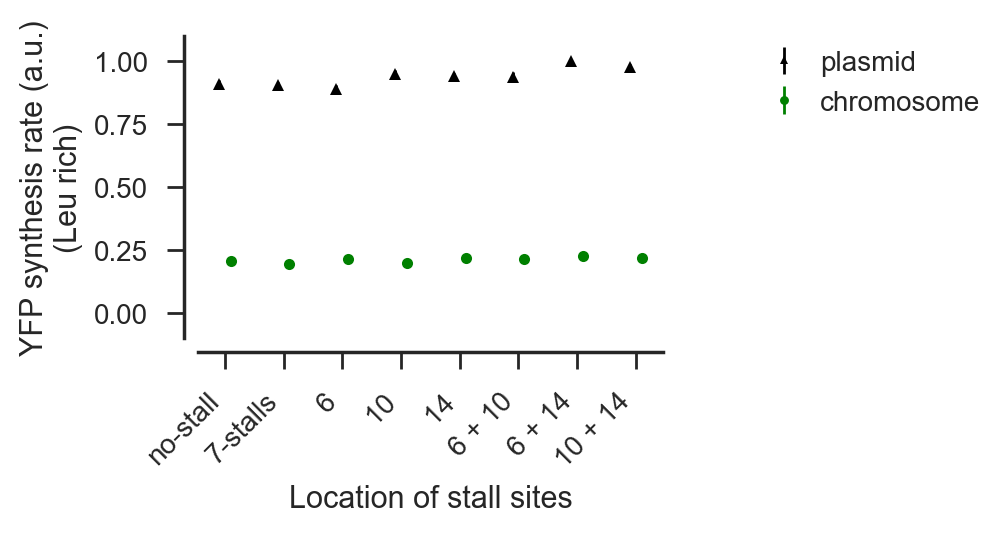

In [88]:
fig = plt.figure()
fig.set_size_inches([3, 2])

ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=5)
subset = plasmiddata
ax.errorbar(
    np.arange(len(subset)) - 0.1,
    subset['richrate_mean'],
    subset['richrate_err'],
    color='black',
    capsize=10,
    elinewidth=1,
    linestyle='None',
    marker='^',
    markersize=4,
    label='plasmid')
subset = chromdata
ax.errorbar(
    np.arange(len(subset)) + 0.1,
    subset['richrate_mean'],
    subset['richrate_err'],
    color='green',
    capsize=10,
    elinewidth=1,
    linestyle='None',
    marker='o',
    markersize=4,
    label='chromosome')
xticklabels = map(
    lambda x: str(x).replace(',', ' + ').replace('nan', 'no-stall'),
    subset.index)
xticklabels[1] = '7-stalls'
ax.set_ylim(bottom=-0.1, top=1.1)
ax.set_xticks(np.arange(len(subset)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')
ax.set(xlabel='Location of stall sites',
       ylabel='YFP synthesis rate (a.u.)\n(Leu rich)')
ax.legend(loc=2, bbox_to_anchor=(1.2, 1))
fig.savefig('../figures/reviewer_response_fig1.svg')

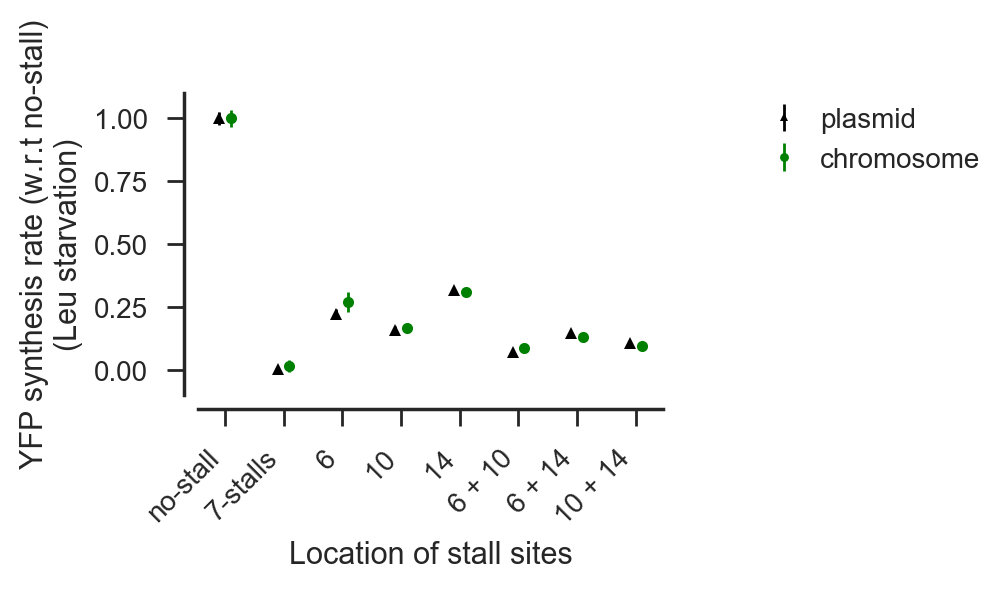

In [90]:
fig = plt.figure()
fig.set_size_inches([3, 2])

ax = fig.add_subplot(1, 1, 1)
sns.despine(offset=5)
subset = plasmiddata
ax.errorbar(
    np.arange(len(subset)) - 0.1,
    subset['starverate_mean'],
    subset['starverate_err'],
    color='black',
    capsize=10,
    elinewidth=1,
    linestyle='None',
    marker='^',
    markersize=4,
    label='plasmid')
subset = chromdata
ax.errorbar(
    np.arange(len(subset)) + 0.1,
    subset['starverate_mean'],
    subset['starverate_err'],
    color='green',
    capsize=10,
    elinewidth=1,
    linestyle='None',
    marker='o',
    markersize=4,
    label='chromosome')
xticklabels = map(
    lambda x: str(x).replace(',', ' + ').replace('nan', 'no-stall'),
    subset.index)
xticklabels[1] = '7-stalls'
ax.set_ylim(bottom=-0.1, top=1.1)
ax.set_xticks(np.arange(len(subset)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')
ax.set(xlabel='Location of stall sites',
       ylabel='YFP synthesis rate (w.r.t no-stall)\n(Leu starvation)')
ax.legend(loc=2, bbox_to_anchor=(1.2, 1))
fig.savefig('../figures/reviewer_response_fig2.svg')